In [23]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import data, util
from skimage.measure import label,perimeter,mesh_surface_area
import cv2
import seaborn as sns
from statannotations.Annotator import Annotator
import pyCompare


# Fig 01 
Scheme: Image processiong + BIDS + Data Augmentation


# Fig 04
Scheme: CSA Meassurements with Bayessian approaches + scaling definition 

# Fig 03 
Results: Boxplots Hybrid DA (arxiv) + table of results (Dice,HD,VS, outliers)



In [7]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'Dice_ds1_gm.xlsx')
data

,Sujet,Class,Slice,Category,DICE GM SCT,DICE GM Static,DICE GM Dynamic,DICE GM Hybrid Static,DICE GM Hybrid Dynamic
0,Sub-77,GM_DS1,2,SLA,0.800000,0.000000,0.000000,0.000000,0.230000
1,Sub-49,GM_DS1,6,MS,0.740000,0.640000,0.580000,0.650000,0.590000
2,Sub-78,GM_DS1,10,SLA,0.650000,0.800000,0.730000,0.190000,0.710000
3,Sub-78,GM_DS1,8,SLA,0.670000,0.740000,0.760000,0.750000,0.740000
4,Sub-77,GM_DS1,16,SLA,0.650000,0.750000,0.740000,0.800000,0.740000
...,...,...,...,...,...,...,...,...,...
461,Sub-0002,SC_DS2,4,HC,0.970000,0.980000,0.980000,0.980000,0.980000
462,7,SC_DS2,0,HC,0.974989,0.974293,0.979609,0.978214,0.980009
463,8,SC_DS2,9,HC,0.967008,0.972033,0.975225,0.973704,0.980762
464,7,SC_DS2,9,HC,0.976536,0.980466,0.981287,0.980142,0.981995


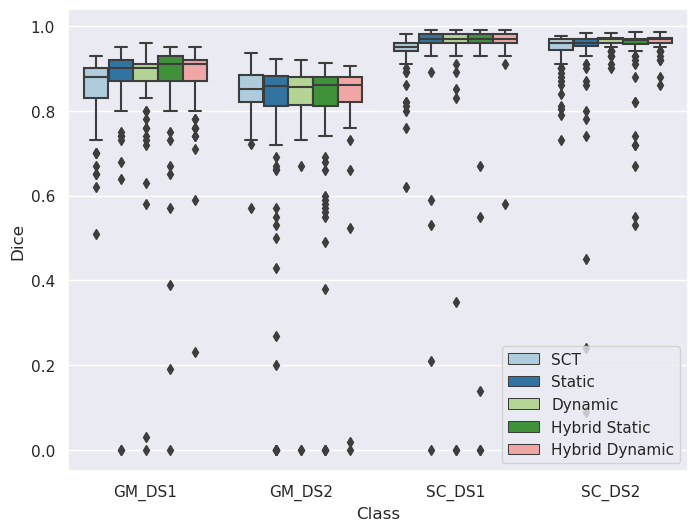

In [8]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'Dice_ds1_gm.xlsx')

df1=data
dice_sct = df1.filter(['DICE GM SCT','Class'], axis=1)
dice_sct.insert(0, 'Group', 'SCT')
dice_sct.rename(columns={'DICE GM SCT': 'CSA_error'}, inplace=True)

dice_static = df1.filter(['DICE GM Static','Class'], axis=1)
dice_static.insert(0, 'Group', 'Static')
dice_static.rename(columns={'DICE GM Static': 'CSA_error'}, inplace=True)

dice_dynamic = df1.filter(['DICE GM Dynamic','Class'], axis=1)
dice_dynamic.insert(0, 'Group', 'Dynamic')
dice_dynamic.rename(columns={'DICE GM Dynamic': 'CSA_error'}, inplace=True)

dice_h_static = df1.filter(['DICE GM Hybrid Static','Class'], axis=1)
dice_h_static.insert(0, 'Group', 'Hybrid Static')
dice_h_static.rename(columns={'DICE GM Hybrid Static': 'CSA_error'}, inplace=True)

dice_h_dynamic = df1.filter(['DICE GM Hybrid Dynamic','Class'], axis=1)
dice_h_dynamic.insert(0, 'Group', 'Hybrid Dynamic')
dice_h_dynamic.rename(columns={'DICE GM Hybrid Dynamic': 'CSA_error'}, inplace=True)

frames = [dice_sct, dice_static, dice_dynamic ,dice_h_static, dice_h_dynamic]
result_csa = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(8,6))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa, x="Class", y="CSA_error", hue="Group",palette="Paired")
ax_csa_gm.set(xlabel = 'Class', ylabel = 'Dice')
plt.legend(loc='best')
plt.savefig(path_database+'Fig_dice_ds1_ds2.pdf')

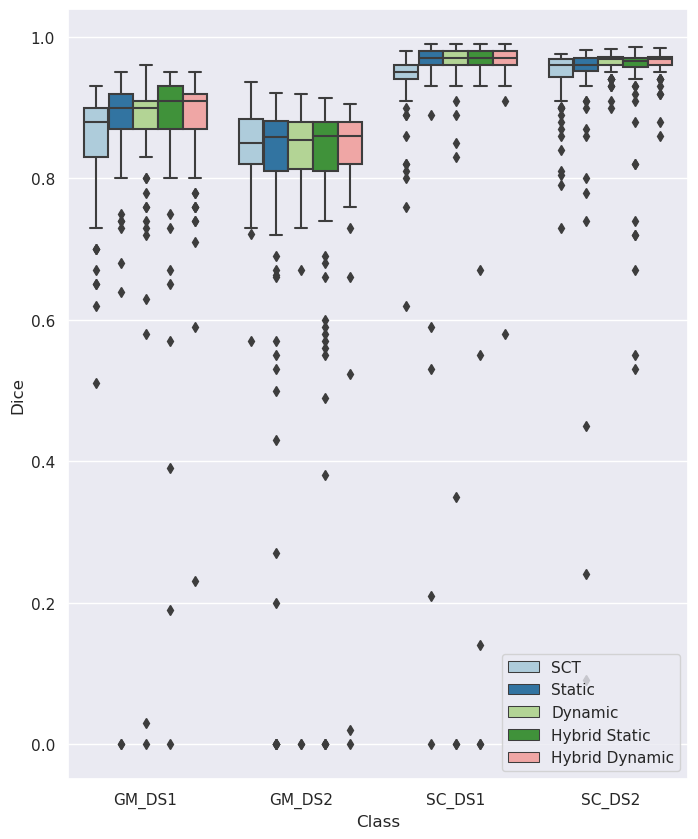

In [12]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'Dice_ds1_gm.xlsx')

df1=data
dice_sct = df1.filter(['DICE GM SCT','Class'], axis=1)
dice_sct.insert(0, 'Group', 'SCT')
dice_sct.rename(columns={'DICE GM SCT': 'CSA_error'}, inplace=True)

dice_static = df1.filter(['DICE GM Static','Class'], axis=1)
dice_static.insert(0, 'Group', 'Static')
dice_static.rename(columns={'DICE GM Static': 'CSA_error'}, inplace=True)

dice_dynamic = df1.filter(['DICE GM Dynamic','Class'], axis=1)
dice_dynamic.insert(0, 'Group', 'Dynamic')
dice_dynamic.rename(columns={'DICE GM Dynamic': 'CSA_error'}, inplace=True)

dice_h_static = df1.filter(['DICE GM Hybrid Static','Class'], axis=1)
dice_h_static.insert(0, 'Group', 'Hybrid Static')
dice_h_static.rename(columns={'DICE GM Hybrid Static': 'CSA_error'}, inplace=True)

dice_h_dynamic = df1.filter(['DICE GM Hybrid Dynamic','Class'], axis=1)
dice_h_dynamic.insert(0, 'Group', 'Hybrid Dynamic')
dice_h_dynamic.rename(columns={'DICE GM Hybrid Dynamic': 'CSA_error'}, inplace=True)

frames = [dice_sct, dice_static, dice_dynamic ,dice_h_static, dice_h_dynamic]
result_csa = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(8,10))
#sns.set()

ax_csa_gm = sns.boxplot(data=result_csa, x="Class", y="CSA_error", hue="Group",palette="Paired")
ax_csa_gm.set(xlabel = 'Class', ylabel = 'Dice')
plt.legend(loc='lower right')
plt.savefig(path_database+'Fig_dice_ds1_ds2.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SC_DS1_GM Hybrid Static vs. SC_DS1_GM Hybrid Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:3.640e-01 U_stat=9.951e+03
SC_DS2_GM SCT vs. SC_DS2_GM Static: Mann-Whitney-Wilcoxon test two-sided, P_val:3.471e-02 U_stat=5.056e+03
SC_DS2_GM Hybrid Static vs. SC_DS2_GM Hybrid Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:7.015e-02 U_stat=5.198e+03
SC_DS1_GM Static vs. SC_DS1_GM Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:4.891e-01 U_stat=9.818e+03
GM_DS2_GM Dynamic vs. GM_DS2_GM Hybrid Static: Mann-Whitney-Wilcoxon test two-sided, P_val:4.025e-01 U_stat=6.446e+03
GM_DS1_GM Dynamic vs. GM_DS1_GM Hybrid Static: Mann-Whitney-Wilcoxon test two-sided, P_val:5.571e-02 U_stat=5.054e+03
GM_DS1_GM SCT vs. GM_DS1_GM Static: Mann-Whitney-Wilcoxon test two-sided, P_val:9.063e-05 U_stat=4.125e+03
GM_DS1_G

(<AxesSubplot:xlabel='Subjects n=5', ylabel='CSA error : Repro intrasession  [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7f1990f8e590>])

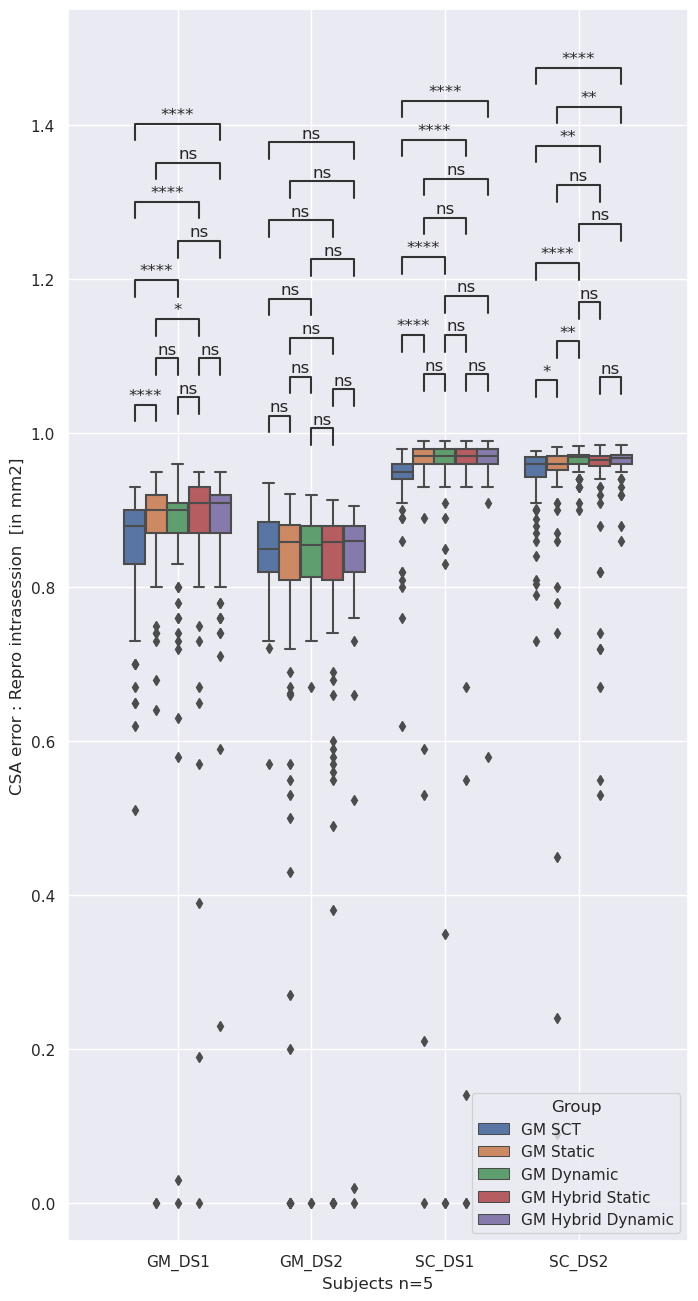

In [17]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'Dice_ds1_gm.xlsx')

df1=data
dice_sct = df1.filter(['DICE GM SCT','Class'], axis=1)
dice_sct.insert(0, 'Group', 'GM SCT')
dice_sct.rename(columns={'DICE GM SCT': 'CSA_error'}, inplace=True)

dice_static = df1.filter(['DICE GM Static','Class'], axis=1)
dice_static.insert(0, 'Group', 'GM Static')
dice_static.rename(columns={'DICE GM Static': 'CSA_error'}, inplace=True)

dice_dynamic = df1.filter(['DICE GM Dynamic','Class'], axis=1)
dice_dynamic.insert(0, 'Group', 'GM Dynamic')
dice_dynamic.rename(columns={'DICE GM Dynamic': 'CSA_error'}, inplace=True)

dice_h_static = df1.filter(['DICE GM Hybrid Static','Class'], axis=1)
dice_h_static.insert(0, 'Group', 'GM Hybrid Static')
dice_h_static.rename(columns={'DICE GM Hybrid Static': 'CSA_error'}, inplace=True)

dice_h_dynamic = df1.filter(['DICE GM Hybrid Dynamic','Class'], axis=1)
dice_h_dynamic.insert(0, 'Group', 'GM Hybrid Dynamic')
dice_h_dynamic.rename(columns={'DICE GM Hybrid Dynamic': 'CSA_error'}, inplace=True)

frames = [dice_sct, dice_static, dice_dynamic ,dice_h_static, dice_h_dynamic]
result_csa = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(8,16))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa, x="Class", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Subjects n=5', ylabel = 'CSA error : Repro intrasession  [in mm2]')

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()

pairs=[(("GM_DS1", "GM SCT"), ("GM_DS1", "GM Static")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Dynamic")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Hybrid Dynamic")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Dynamic")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Hybrid Dynamic")),
       (("GM_DS1", "GM Dynamic"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM Dynamic"), ("GM_DS1", "GM Hybrid Dynamic")),       
       (("GM_DS1", "GM Hybrid Static"), ("GM_DS1", "GM Hybrid Dynamic")),
       
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Static")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Dynamic")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Hybrid Dynamic")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Dynamic")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Hybrid Dynamic")),
       (("SC_DS1", "GM Dynamic"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM Dynamic"), ("SC_DS1", "GM Hybrid Dynamic")),       
       (("SC_DS1", "GM Hybrid Static"), ("SC_DS1", "GM Hybrid Dynamic")),
       
       
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Static")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Dynamic")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Hybrid Dynamic")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Dynamic")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Hybrid Dynamic")),
       (("GM_DS2", "GM Dynamic"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM Dynamic"), ("GM_DS2", "GM Hybrid Dynamic")),       
       (("GM_DS2", "GM Hybrid Static"), ("GM_DS2", "GM Hybrid Dynamic")),
       
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Static")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Dynamic")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Hybrid Dynamic")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Dynamic")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Hybrid Dynamic")),
       (("SC_DS2", "GM Dynamic"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM Dynamic"), ("SC_DS2", "GM Hybrid Dynamic")),       
       (("SC_DS2", "GM Hybrid Static"), ("SC_DS2", "GM Hybrid Dynamic"))
      ]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa, x="Class", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
#plt.savefig('Fig_repro.pdf')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GM_DS2_GM Hybrid Static vs. GM_DS2_GM Hybrid Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:1.901e-01 U_stat=1.660e+03
SC_DS2_GM SCT vs. SC_DS2_GM Static: Mann-Whitney-Wilcoxon test two-sided, P_val:2.635e-01 U_stat=1.702e+03
SC_DS2_GM Hybrid Static vs. SC_DS2_GM Hybrid Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:1.277e-01 U_stat=1.624e+03
SC_DS1_GM Dynamic vs. SC_DS1_GM Hybrid Static: Mann-Whitney-Wilcoxon test two-sided, P_val:8.485e-02 U_stat=8.308e+03
GM_DS2_GM Static vs. GM_DS2_GM Dynamic: Mann-Whitney-Wilcoxon test two-sided, P_val:1.078e-01 U_stat=1.600e+03
GM_DS1_GM Dynamic vs. GM_DS1_GM Hybrid Static: Mann-Whitney-Wilcoxon test two-sided, P_val:5.571e-02 U_stat=5.054e+03
GM_DS1_GM SCT vs. GM_DS1_GM Static: Mann-Whitney-Wilcoxon test two-sided, P_val:9.063e-05 U_stat=4.125e+03
GM_DS1_G

(<AxesSubplot:xlabel='Subjects n=5', ylabel='CSA error : Repro intrasession  [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7ff0528a7510>])

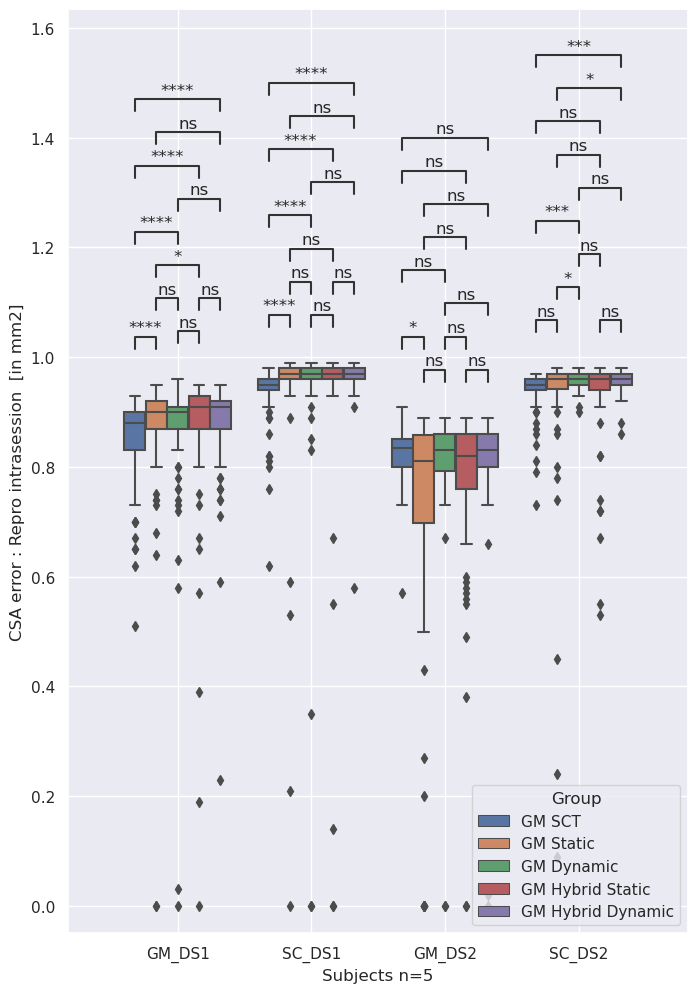

In [109]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'Dice_ds1_gm.xlsx')

df1=data
dice_sct = df1.filter(['DICE GM SCT','Class'], axis=1)
dice_sct.insert(0, 'Group', 'GM SCT')
dice_sct.rename(columns={'DICE GM SCT': 'CSA_error'}, inplace=True)

dice_static = df1.filter(['DICE GM Static','Class'], axis=1)
dice_static.insert(0, 'Group', 'GM Static')
dice_static.rename(columns={'DICE GM Static': 'CSA_error'}, inplace=True)

dice_dynamic = df1.filter(['DICE GM Dynamic','Class'], axis=1)
dice_dynamic.insert(0, 'Group', 'GM Dynamic')
dice_dynamic.rename(columns={'DICE GM Dynamic': 'CSA_error'}, inplace=True)

dice_h_static = df1.filter(['DICE GM Hybrid Static','Class'], axis=1)
dice_h_static.insert(0, 'Group', 'GM Hybrid Static')
dice_h_static.rename(columns={'DICE GM Hybrid Static': 'CSA_error'}, inplace=True)

dice_h_dynamic = df1.filter(['DICE GM Hybrid Dynamic','Class'], axis=1)
dice_h_dynamic.insert(0, 'Group', 'GM Hybrid Dynamic')
dice_h_dynamic.rename(columns={'DICE GM Hybrid Dynamic': 'CSA_error'}, inplace=True)

frames = [dice_sct, dice_static, dice_dynamic ,dice_h_static, dice_h_dynamic]
result_csa = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(8,12))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa, x="Class", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Subjects n=5', ylabel = 'CSA error : Repro intrasession  [in mm2]')

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()

pairs=[(("GM_DS1", "GM SCT"), ("GM_DS1", "GM Static")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Dynamic")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM SCT"), ("GM_DS1", "GM Hybrid Dynamic")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Dynamic")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM Static"), ("GM_DS1", "GM Hybrid Dynamic")),
       (("GM_DS1", "GM Dynamic"), ("GM_DS1", "GM Hybrid Static")),
       (("GM_DS1", "GM Dynamic"), ("GM_DS1", "GM Hybrid Dynamic")),       
       (("GM_DS1", "GM Hybrid Static"), ("GM_DS1", "GM Hybrid Dynamic")),
       
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Static")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Dynamic")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM SCT"), ("SC_DS1", "GM Hybrid Dynamic")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Dynamic")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM Static"), ("SC_DS1", "GM Hybrid Dynamic")),
       (("SC_DS1", "GM Dynamic"), ("SC_DS1", "GM Hybrid Static")),
       (("SC_DS1", "GM Dynamic"), ("SC_DS1", "GM Hybrid Dynamic")),       
       (("SC_DS1", "GM Hybrid Static"), ("SC_DS1", "GM Hybrid Dynamic")),
       
       
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Static")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Dynamic")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM SCT"), ("GM_DS2", "GM Hybrid Dynamic")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Dynamic")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM Static"), ("GM_DS2", "GM Hybrid Dynamic")),
       (("GM_DS2", "GM Dynamic"), ("GM_DS2", "GM Hybrid Static")),
       (("GM_DS2", "GM Dynamic"), ("GM_DS2", "GM Hybrid Dynamic")),       
       (("GM_DS2", "GM Hybrid Static"), ("GM_DS2", "GM Hybrid Dynamic")),
       
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Static")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Dynamic")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM SCT"), ("SC_DS2", "GM Hybrid Dynamic")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Dynamic")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM Static"), ("SC_DS2", "GM Hybrid Dynamic")),
       (("SC_DS2", "GM Dynamic"), ("SC_DS2", "GM Hybrid Static")),
       (("SC_DS2", "GM Dynamic"), ("SC_DS2", "GM Hybrid Dynamic")),       
       (("SC_DS2", "GM Hybrid Static"), ("SC_DS2", "GM Hybrid Dynamic"))
      ]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa, x="Class", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
#plt.savefig('Fig_repro.pdf')



# Fig 02
Results: CSA full Data + Bayessian approaches boxplot + error intrassesion (CSA, Dice?)


[Text(0.5, 0, 'Category      n=78'), Text(0, 0.5, 'CSA [in mm2]')]

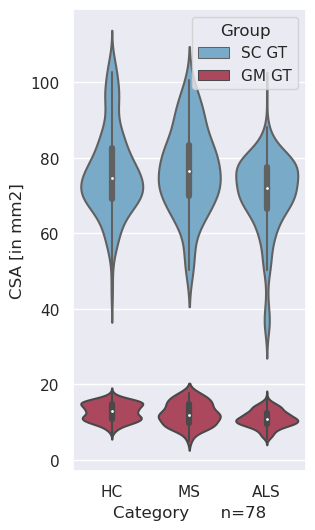

In [43]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_GT_full_data.xlsx')

df1=data
gt_csa_sc = df1.filter(['CSA SC GT','Category'], axis=1)
gt_csa_sc.insert(0, 'Group', 'SC GT')
gt_csa_sc.rename(columns={'CSA SC GT': 'CSA'}, inplace=True)

gt_csa_gm = df1.filter(['CSA GM GT','Category'], axis=1)
gt_csa_gm.insert(0, 'Group', 'GM GT')
gt_csa_gm.rename(columns={'CSA GM GT': 'CSA'}, inplace=True)

frames = [gt_csa_sc]
result_csa = pd.concat(frames, axis=0)

plt.figure(figsize=(3,6))
ax_csa_gm = sns.violinplot(data=result_csa, x="Category", y="CSA", hue="Group",palette="Blues_r")
ax_csa_gm.set(xlabel = 'Category', ylabel = 'CSA [in mm2]')

frames = [ gt_csa_gm]
result_csa = pd.concat(frames, axis=0)
#plt.figure(figsize=(16,10))
ax_csa_gm = sns.violinplot(data=result_csa, x="Category", y="CSA", hue="Group",palette="inferno")
ax_csa_gm.set(xlabel = 'Category      n=78', ylabel = 'CSA [in mm2]')
#plt.savefig('Fig_CSA_full_data.pdf')



In [44]:
data

,total,subject,slice,Category,CSA SC algo,CSA GM algo,CSA SC GT,CSA GM GT
0,all,1,0,HC,66.031265,9.424210,64.764404,9.702301
1,all,1,1,HC,87.258911,16.252899,86.795425,15.789413
2,all,1,2,HC,100.205612,16.685486,98.660660,16.716385
3,all,1,3,HC,101.379776,15.418625,99.834824,15.480423
4,all,1,4,HC,96.096039,11.927032,91.955566,11.741638
...,...,...,...,...,...,...,...,...
987,all,78,12,ALS,61.643600,6.581497,65.166092,NaN
988,all,78,13,ALS,63.837433,10.227585,68.873978,NaN
989,all,78,14,ALS,63.435745,NaN,68.812180,NaN
990,all,78,15,ALS,61.272812,NaN,64.764404,NaN


In [51]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_GT_full_data.xlsx')

#plt.savefig('Fig_repro.pdf')
table=[]
csa_gt_sc= pd.pivot_table(data, values=['CSA SC GT'], index=['Category'],
                    aggfunc={'CSA SC GT': np.mean})
csa_gt_gm= pd.pivot_table(data, values=['CSA GM GT'], index=['Category'],
                    aggfunc={'CSA GM GT': np.mean})
csa_gt_sc_std= pd.pivot_table(data, values=['CSA SC GT'], index=['Category'],
                    aggfunc={'CSA SC GT': np.std})
csa_gt_gm_std= pd.pivot_table(data, values=['CSA GM GT'], index=['Category'],
                    aggfunc={'CSA GM GT': np.std})

csa_dl_sc= pd.pivot_table(data, values=['CSA SC algo'], index=['Category'],
                    aggfunc={'CSA SC algo': np.mean})
csa_dl_gm= pd.pivot_table(data, values=['CSA GM algo'], index=['Category'],
                    aggfunc={'CSA GM algo': np.mean})
csa_dl_sc_std= pd.pivot_table(data, values=['CSA SC algo'], index=['Category'],
                    aggfunc={'CSA SC algo': np.std})
csa_dl_gm_std= pd.pivot_table(data, values=['CSA GM algo'], index=['Category'],
                    aggfunc={'CSA GM algo': np.std})

print('mean,sdt')
frames = [csa_gt_sc,csa_gt_sc_std, csa_gt_gm,csa_gt_gm_std,csa_dl_sc, csa_dl_sc_std,csa_dl_gm,csa_dl_gm_std]
result = pd.concat(frames,axis=1)
result


mean,sdt


,CSA SC GT,CSA SC GT,CSA GM GT,CSA GM GT,CSA SC algo,CSA SC algo,CSA GM algo,CSA GM algo
Category,,,,,,,,
ALS,70.357508,10.358275,10.915415,2.221340,70.828477,10.826599,11.407549,1.957745
HC,76.278013,11.541460,12.746722,2.331903,78.243858,11.041969,12.844293,2.368942
MS,76.649707,11.177953,12.192278,3.047645,74.672075,10.225752,11.656399,1.980652


In [46]:
df=[]
d1 = {'Class':'algo','Mean SC':pd.DataFrame.mean(data['CSA SC algo']),'Mean GM':pd.DataFrame.mean(data['CSA GM algo']),
        'Median SC':pd.DataFrame.median(data['CSA SC algo']),'Median GM':pd.DataFrame.median(data['CSA GM algo']),
        'Std SC':pd.DataFrame.std(data['CSA SC algo']),'Std GM':pd.DataFrame.std(data['CSA GM algo'])}
d2 = {'Class':'GT','Mean SC':pd.DataFrame.mean(data['CSA SC GT']),'Mean GM':pd.DataFrame.mean(data['CSA GM GT']),
        'Median SC':pd.DataFrame.median(data['CSA SC GT']),'Median GM':pd.DataFrame.median(data['CSA GM GT']),
        'Std SC':pd.DataFrame.std(data['CSA SC GT']),'Std GM':pd.DataFrame.std(data['CSA GM GT'])}

df.append(d1)
df.append(d2)
table = pd.DataFrame(data=df)
print ('total')
table

total


,Class,Mean SC,Mean GM,Median SC,Median GM,Std SC,Std GM
0,algo,74.635209,12.158917,74.945641,12.019730,11.403686,2.282342
1,GT,73.683562,11.985443,73.601532,11.849785,11.376825,2.533262


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_SC GT vs. 1_SC 7T seg: Mann-Whitney-Wilcoxon test two-sided, P_val:6.184e-01 U_stat=1.072e+04
1_SC 7T seg vs. 1_SC soft: Mann-Whitney-Wilcoxon test two-sided, P_val:6.862e-01 U_stat=1.065e+04
1_SC GT vs. 1_SC soft: Mann-Whitney-Wilcoxon test two-sided, P_val:4.082e-01 U_stat=1.095e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_GM GT vs. 1_GM 7T seg: Mann-Whitney-Wilcoxon test two-sided, P_val:2.409e-02 U_stat=1.196e+04
1_GM 7T seg vs. 1_GM soft: Mann-Whitney-Wilcoxon test two-sided, P_val:1.020e-01 U_stat=1.152e+04
1_GM GT vs. 1_GM soft: Mann-Whitney-Wilcoxon test two-sided, P_val:1.804e-04 U_stat=1.302e+04


[Text(0.5, 32.249999999999986, 'n=12'),
 Text(-0.7499999999999982, 0.5, 'CSA from GT, deterministic and Soft masks [in mm2]')]

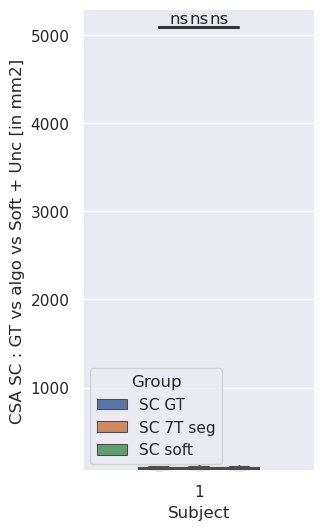

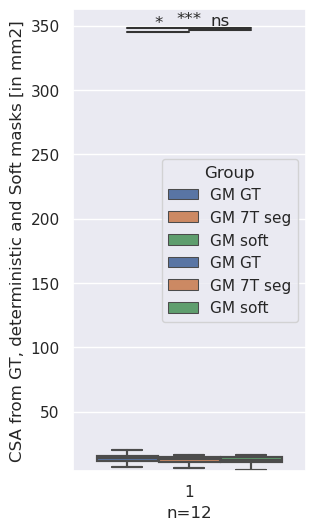

In [17]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_hc_soft_gt_dl.xlsx')

df1=data
gt_csa_sc = df1.filter(['csa_sc_gt','todo'], axis=1)
gt_csa_sc.insert(0, 'Group', 'SC GT')
gt_csa_sc.rename(columns={'csa_sc_gt': 'CSA'}, inplace=True)

dl_csa_sc = df1.filter(['csa_sc_dl','todo'], axis=1)
dl_csa_sc.insert(0, 'Group', 'SC 7T seg')
dl_csa_sc.rename(columns={'csa_sc_dl': 'CSA'}, inplace=True)

dl_csa_sc_soft = df1.filter(['csa_sc_soft','todo'], axis=1)
dl_csa_sc_soft.insert(0, 'Group', 'SC soft')
dl_csa_sc_soft.rename(columns={'csa_sc_soft': 'CSA'}, inplace=True)

frames = [gt_csa_sc, dl_csa_sc,dl_csa_sc_soft]
result_csa = pd.concat(frames, axis=0)



plt.figure(figsize=(3,6))
ax_csa_gm = sns.boxplot(data=result_csa, x="todo", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'Subject', ylabel = 'CSA SC : GT vs algo vs Soft + Unc [in mm2]')
#plt.savefig('Fig_.pdf')
pairs=[((1, "SC GT"), (1, "SC 7T seg")),
       ((1, "SC GT"), (1, "SC soft")),
       ((1, "SC soft"), (1, "SC 7T seg"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa, x="todo", y="CSA", hue='Group') #, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
#plt.show()
plt.figure(figsize=(3,6))
df1=data
gt_csa_gm = df1.filter(['csa_gm_gt','todo'], axis=1)
gt_csa_gm.insert(0, 'Group', 'GM GT')
gt_csa_gm.rename(columns={'csa_gm_gt': 'CSA'}, inplace=True)

dl_csa_gm = df1.filter(['csa_gm_dl','todo'], axis=1)
dl_csa_gm.insert(0, 'Group', 'GM 7T seg')
dl_csa_gm.rename(columns={'csa_gm_dl': 'CSA'}, inplace=True)

dl_csa_gm_soft = df1.filter(['csa_gm_soft','todo'], axis=1)
dl_csa_gm_soft.insert(0, 'Group', 'GM soft')
dl_csa_gm_soft.rename(columns={'csa_gm_soft': 'CSA'}, inplace=True)


frames = [gt_csa_gm,dl_csa_gm,dl_csa_gm_soft]
result_csa = pd.concat(frames, axis=0)

#plt.figure(figsize=(9,3))

ax_csa_gm = sns.boxplot(data=result_csa, x="todo", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'n=12', ylabel = 'CSA from GT, deterministic and Soft masks [in mm2]')
ax_csa_gm.get_legend().remove()

pairs=[((1, "GM GT"), (1, "GM 7T seg")),
       ((1, "GM GT"), (1, "GM soft")),
       ((1, "GM soft"), (1, "GM 7T seg"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa, x="todo", y="CSA", hue='Group') #, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()
#plt.savefig('Fig_.pdf')


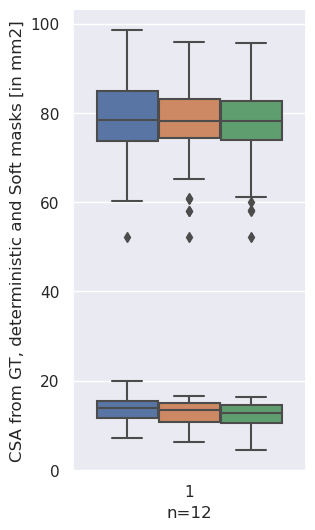

In [19]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_hc_soft_gt_dl.xlsx')

df1=data
gt_csa_sc = df1.filter(['csa_sc_gt','todo'], axis=1)
gt_csa_sc.insert(0, 'Group', 'SC GT')
gt_csa_sc.rename(columns={'csa_sc_gt': 'CSA'}, inplace=True)

dl_csa_sc = df1.filter(['csa_sc_dl','todo'], axis=1)
dl_csa_sc.insert(0, 'Group', 'SC 7T seg')
dl_csa_sc.rename(columns={'csa_sc_dl': 'CSA'}, inplace=True)

dl_csa_sc_soft = df1.filter(['csa_sc_soft','todo'], axis=1)
dl_csa_sc_soft.insert(0, 'Group', 'SC soft')
dl_csa_sc_soft.rename(columns={'csa_sc_soft': 'CSA'}, inplace=True)

frames = [gt_csa_sc, dl_csa_sc,dl_csa_sc_soft]
result_csa = pd.concat(frames, axis=0)



plt.figure(figsize=(3,6))
ax_csa_gm = sns.boxplot(data=result_csa, x="todo", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'Subject', ylabel = 'CSA SC : GT vs algo vs Soft + Unc [in mm2]')
df1=data
gt_csa_gm = df1.filter(['csa_gm_gt','todo'], axis=1)
gt_csa_gm.insert(0, 'Group', 'GM GT')
gt_csa_gm.rename(columns={'csa_gm_gt': 'CSA'}, inplace=True)

dl_csa_gm = df1.filter(['csa_gm_dl','todo'], axis=1)
dl_csa_gm.insert(0, 'Group', 'GM 7T seg')
dl_csa_gm.rename(columns={'csa_gm_dl': 'CSA'}, inplace=True)

dl_csa_gm_soft = df1.filter(['csa_gm_soft','todo'], axis=1)
dl_csa_gm_soft.insert(0, 'Group', 'GM soft')
dl_csa_gm_soft.rename(columns={'csa_gm_soft': 'CSA'}, inplace=True)


frames = [gt_csa_gm,dl_csa_gm,dl_csa_gm_soft]
result_csa = pd.concat(frames, axis=0)

#plt.figure(figsize=(9,3))

ax_csa_gm = sns.boxplot(data=result_csa, x="todo", y="CSA", hue="Group")
ax_csa_gm.set(xlabel = 'n=12', ylabel = 'CSA from GT, deterministic and Soft masks [in mm2]')

ax_csa_gm.get_legend().remove()


[Text(0.5, 0, 'Subjects n=5'),
 Text(0, 0.5, 'CSA error : \n Repro intrasession  [in mm2]')]

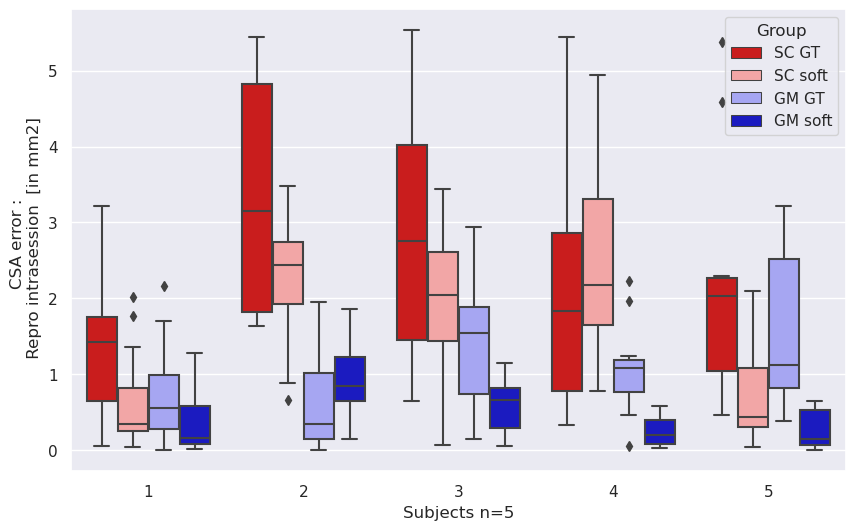

In [48]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_repro_gt_dl_final.xlsx')
df1=data
dl_csa_sc = df1.filter(['Repro SC algo','Subject'], axis=1)
dl_csa_sc.insert(0, 'Group', 'SC algo')
dl_csa_sc.rename(columns={'Repro SC algo': 'CSA_error'}, inplace=True)

dl_csa_gm = df1.filter(['Repro GM algo','Subject'], axis=1)
dl_csa_gm.insert(0, 'Group', 'GM algo')
dl_csa_gm.rename(columns={'Repro GM algo': 'CSA_error'}, inplace=True)

soft_csa_sc = df1.filter(['Repro SC soft','Subject'], axis=1)
soft_csa_sc.insert(0, 'Group', 'SC soft')
soft_csa_sc.rename(columns={'Repro SC soft': 'CSA_error'}, inplace=True)

soft_csa_gm = df1.filter(['Repro GM soft','Subject'], axis=1)
soft_csa_gm.insert(0, 'Group', 'GM soft')
soft_csa_gm.rename(columns={'Repro GM soft': 'CSA_error'}, inplace=True)

gt_csa_sc = df1.filter(['Repro SC GT','Subject'], axis=1)
gt_csa_sc.insert(0, 'Group', 'SC GT')
gt_csa_sc.rename(columns={'Repro SC GT': 'CSA_error'}, inplace=True)

gt_csa_gm = df1.filter(['Repro GM GT','Subject'], axis=1)
gt_csa_gm.insert(0, 'Group', 'GM GT')
gt_csa_gm.rename(columns={'Repro GM GT': 'CSA_error'}, inplace=True)


frames = [gt_csa_sc, soft_csa_sc, gt_csa_gm ,soft_csa_gm ]
result_csa = pd.concat(frames, axis=0)

plt.figure(figsize=(10,6))
ax_csa_gm = sns.boxplot(data=result_csa, x="Subject", y="CSA_error", hue="Group",palette="seismic_r")
ax_csa_gm.set(xlabel = 'Subjects n=5', ylabel = 'CSA error : \n Repro intrasession  [in mm2]')

#plt.savefig('Fig_repro.pdf')

[Text(0.5, 0, 'Subjects n=5'), Text(0, 0.5, 'CSA difference [in mm2]')]

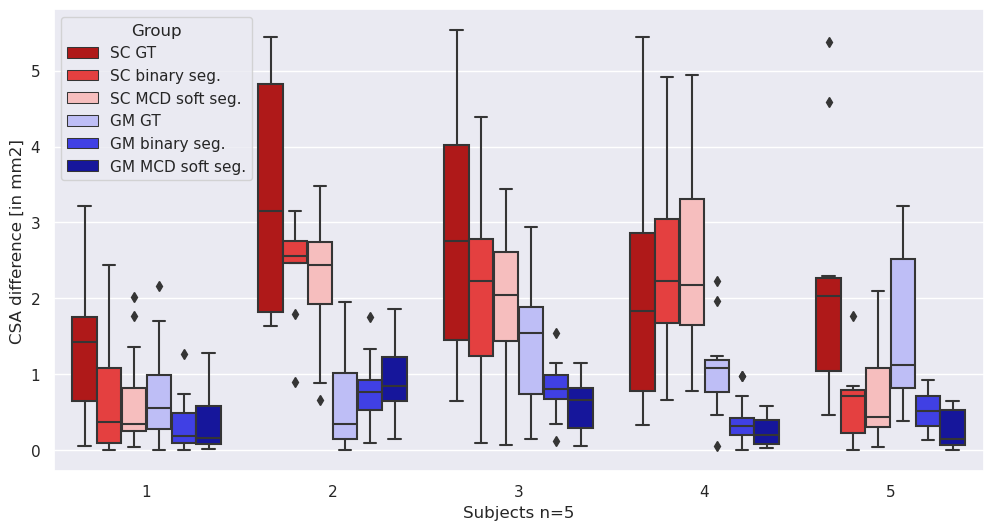

In [21]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_repro_gt_dl_final.xlsx')
df1=data
dl_csa_sc = df1.filter(['Repro SC algo','Subject'], axis=1)
dl_csa_sc.insert(0, 'Group', 'SC binary seg.')
dl_csa_sc.rename(columns={'Repro SC algo': 'CSA_error'}, inplace=True)

dl_csa_gm = df1.filter(['Repro GM algo','Subject'], axis=1)
dl_csa_gm.insert(0, 'Group', 'GM binary seg.')
dl_csa_gm.rename(columns={'Repro GM algo': 'CSA_error'}, inplace=True)

soft_csa_sc = df1.filter(['Repro SC soft','Subject'], axis=1)
soft_csa_sc.insert(0, 'Group', 'SC MCD soft seg.')
soft_csa_sc.rename(columns={'Repro SC soft': 'CSA_error'}, inplace=True)

soft_csa_gm = df1.filter(['Repro GM soft','Subject'], axis=1)
soft_csa_gm.insert(0, 'Group', 'GM MCD soft seg.')
soft_csa_gm.rename(columns={'Repro GM soft': 'CSA_error'}, inplace=True)

gt_csa_sc = df1.filter(['Repro SC GT','Subject'], axis=1)
gt_csa_sc.insert(0, 'Group', 'SC GT')
gt_csa_sc.rename(columns={'Repro SC GT': 'CSA_error'}, inplace=True)

gt_csa_gm = df1.filter(['Repro GM GT','Subject'], axis=1)
gt_csa_gm.insert(0, 'Group', 'GM GT')
gt_csa_gm.rename(columns={'Repro GM GT': 'CSA_error'}, inplace=True)


frames = [gt_csa_sc, dl_csa_sc, soft_csa_sc, gt_csa_gm,dl_csa_gm ,soft_csa_gm ]
result_csa = pd.concat(frames, axis=0)

plt.figure(figsize=(12,6))
ax_csa_gm = sns.boxplot(data=result_csa, x="Subject", y="CSA_error", hue="Group",palette="seismic_r")
ax_csa_gm.set(xlabel = 'Subjects n=5', ylabel = 'CSA difference [in mm2]')

#plt.savefig('Fig_repro.pdf')

In [75]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'csa_repro_gt_dl_final.xlsx')
df=[]
d1 = {'Class':'Deterministic','Mean SC':pd.DataFrame.mean(data['Repro SC algo']),'Mean GM':pd.DataFrame.mean(data['Repro GM algo']),
        'Median SC':pd.DataFrame.median(data['Repro SC algo']),'Median GM':pd.DataFrame.median(data['Repro GM algo']),
        'Std SC':pd.DataFrame.std(data['Repro SC algo']),'Std GM':pd.DataFrame.std(data['Repro GM algo'])}
d2 = {'Class':'GT','Mean SC':pd.DataFrame.mean(data['Repro SC GT']),'Mean GM':pd.DataFrame.mean(data['Repro GM GT']),
        'Median SC':pd.DataFrame.median(data['Repro SC GT']),'Median GM':pd.DataFrame.median(data['Repro GM GT']),
        'Std SC':pd.DataFrame.std(data['Repro SC GT']),'Std GM':pd.DataFrame.std(data['Repro GM GT'])}
d3 = {'Class':'soft','Mean SC':pd.DataFrame.mean(data['Repro SC soft']),'Mean GM':pd.DataFrame.mean(data['Repro GM soft']),
        'Median SC':pd.DataFrame.median(data['Repro SC soft']),'Median GM':pd.DataFrame.median(data['Repro GM soft']),
        'Std SC':pd.DataFrame.std(data['Repro SC soft']),'Std GM':pd.DataFrame.std(data['Repro GM soft'])}

df.append(d1)
df.append(d2)
df.append(d3)
table = pd.DataFrame(data=df)
table

,Class,Mean SC,Mean GM,Median SC,Median GM,Std SC,Std GM
0,Deterministic,1.555446,0.544395,1.390457,0.478935,1.256193,0.396674
1,GT,2.228823,1.086555,1.792145,0.954385,1.526307,0.831140
2,soft,1.485817,0.464891,1.247048,0.386335,1.181152,0.423149


# Fig 05
Scaling Sub 29 

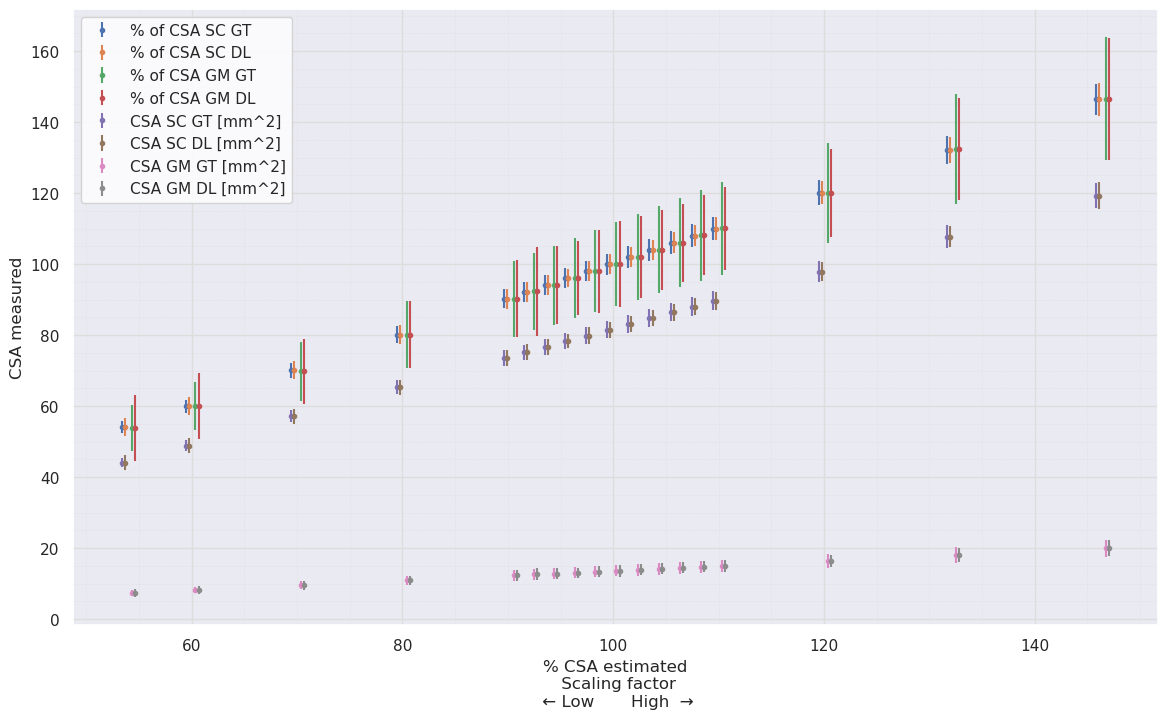

In [49]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/sub_29.xlsx')
fig, ax = plt.subplots(figsize=(14,8))

x_1 = np.array(data['Factor'])
x_2 = np.array(data['Factor'])
y_1 = np.array(data['% sc_gt'])
y_2 = np.array(data['% sc_dl'])
e_1 = np.array(data['SD_sc_gt'])
e_2 = np.array(data['SD_sc_dl'])
plt.errorbar(x_1-0.6, y_1, e_1, linestyle='None', marker='.',label='% of CSA SC GT')
plt.errorbar(x_2-0.3, y_1, e_2, linestyle='None', marker='.',label='% of CSA SC DL' )

x_1 = np.array(data['Factor'])
x_2 = np.array(data['Factor'])
y_1 = np.array(data['% gm_gt'])
y_2 = np.array(data['% gm_dl'])
e_1 = np.array(data['SD_gm_gt'])
e_2 = np.array(data['SD_gm_dl'])
plt.xlabel('% CSA estimated\n Scaling factor\n ← Low       High  →')
plt.ylabel('CSA measured')
plt.errorbar(x_1+0.3, y_1, e_1, linestyle='None', marker='.',label='% of CSA GM GT')
plt.errorbar(x_2+0.6, y_1, e_2, linestyle='None', marker='.',label='% of CSA GM DL' )

x_1 = np.array(data['Factor'])
x_2 = np.array(data['Factor'])
y_1 = np.array(data['csa_soft_sc_gt'])
y_2 = np.array(data['csa_soft_sc_gt'])
e_1 = np.array(data['SD_sc_gt 2'])
e_2 = np.array(data['SD_sc_dl 2'])

plt.errorbar(x_1-0.6, y_1, e_1, linestyle='None', marker='.',label='CSA SC GT [mm^2]' )
plt.errorbar(x_2-0.3, y_1, e_2, linestyle='None', marker='.',label='CSA SC DL [mm^2]' )

x_1 = np.array(data['Factor'])
x_2 = np.array(data['Factor'])
y_1 = np.array(data['csa_soft_gm_gt'])
y_2 = np.array(data['csa_soft_gm_gt'])
e_1 = np.array(data['SD_gm_gt no'])
e_2 = np.array(data['SD_gm_dl no'])

plt.errorbar(x_1+0.3, y_1, e_1, linestyle='None', marker='.',label='CSA GM GT [mm^2]' )
plt.errorbar(x_2+0.6, y_1, e_2, linestyle='None', marker='.',label='CSA GM DL [mm^2]' )
plt.legend(loc='best')
plt.legend(frameon = 1,facecolor="white")

ax.grid(which='major', color='#DDDDDD', linewidth=1)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.savefig(path_database + 'Fig_sub_29_%.pdf')
plt.show()

# Fig 06
Scaling boxplot + error scaling 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.200e+01
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.454e-01 U_stat=3.700e+01
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.746e-01 U_stat=3.400e+01
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.984e-01 U_stat=3.500e+01
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.785e-01 U_stat=3.400e+01
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.209e-01 U_stat=3.600e+01
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.737e-01 U_stat=3.800e+01
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.454e-01 U_stat=3.700e+01
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.737e-01 U_stat=3.800e+01
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA SC (soft) [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7ffab6ad09d0>])

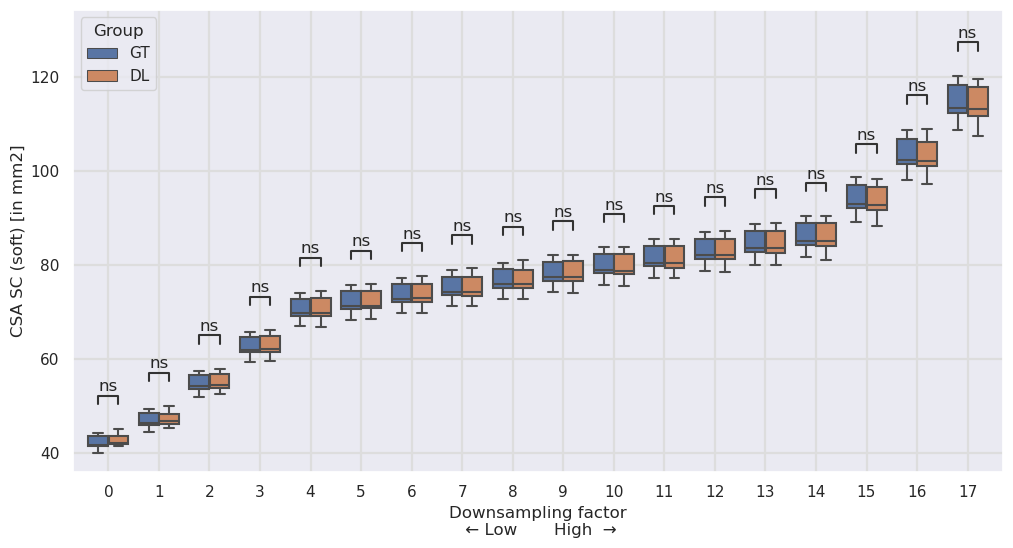

In [22]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_sc.xlsx')

df1=data
df_csa_gm = df1.filter(['csa_soft_sc_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_soft_sc_gt': 'CSA_error'}, inplace=True)

df_csa_lin_gm = df1.filter(['csa_soft_sc_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_soft_sc_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(12,6))
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
sns.set()
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group", ax=ax)
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA SC (soft) [in mm2]')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()


pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

#plt.savefig(path_database + 'Fig_CSA_SC_soft.pdf')

In [37]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_sc.xlsx')
data

,ID,Sub,Slice,transf,csa_soft_sc_gt,SD_sc_gt,csa_sc_gt,csa_soft_sc_dl,SD_sc_dl,csa_sc_dl,% sc_gt soft+unc,% sc_dl soft+unc,error_sc % soft+unc,% sc_gt,% SD SC GT,% sc_dl,% SD SC DL,error_sc %
0,1,28,4,0,41.75,1.45,43.20,42.06,1.74,43.80,54.07,54.82,0.74,53.961484,1.874111,54.306004,2.246611,0.344520
1,1,28,4,1,46.48,1.49,47.96,46.80,1.60,48.41,60.04,60.58,0.54,60.074964,1.925811,60.426081,2.065849,0.351117
2,1,28,4,2,54.22,1.78,56.00,54.47,2.00,56.48,70.10,70.68,0.57,70.078842,2.300633,70.329245,2.582311,0.250403
3,1,28,4,3,62.01,2.01,64.02,62.23,2.20,64.42,80.14,80.62,0.48,80.147344,2.597906,80.348612,2.840542,0.201268
4,1,28,4,4,69.81,2.26,72.07,69.88,2.63,72.51,90.22,90.74,0.52,90.228771,2.921029,90.225952,3.395739,0.002819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11,35,17,13,82.83,3.89,86.72,82.69,4.38,87.07,108.04,108.55,0.52,108.034433,5.073692,107.978584,5.719509,0.055849
140,11,35,17,14,84.36,3.96,88.32,84.04,4.36,88.39,110.03,110.20,0.17,110.029999,5.164993,109.741447,5.693393,0.288552
141,11,35,17,15,92.09,4.32,96.40,91.27,3.82,95.10,120.10,118.56,1.54,120.112169,5.634538,119.182554,4.988248,0.929615
142,11,35,17,16,101.43,4.78,106.21,100.47,5.07,105.54,132.32,131.59,0.73,132.294248,6.234512,131.196135,6.620528,1.098113


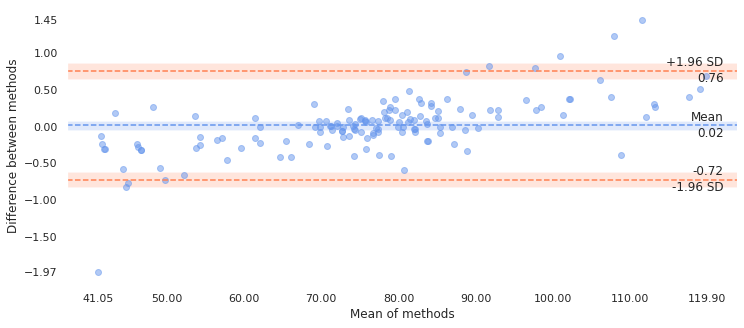

In [41]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_sc.xlsx')
method1 = data['csa_soft_sc_gt']#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
method2 = data['csa_soft_sc_dl']#[1.03, 2.05, 2.79, 3.67, 5.00, 5.82, 7.16, 7.69, 8.53, 10.38, 11.11, 12.17, 13.47, 13.83, 15.15, 16.12, 16.94, 18.09, 19.13, 19.54]
#plt.subplots(figsize=(12,6))
pyCompare.blandAltman(method1, method2, figureSize=((12,5)))

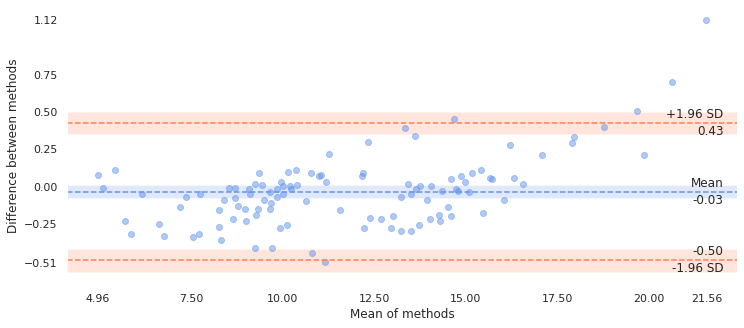

In [42]:
data=pd.read_excel(path_database + '/csa_dl_gt_clean_gm.xlsx')
method1 = data['csa_soft_gm_gt']#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
method2 = data['csa_soft_gm_dl']#[1.03, 2.05, 2.79, 3.67, 5.00, 5.82, 7.16, 7.69, 8.53, 10.38, 11.11, 12.17, 13.47, 13.83, 15.15, 16.12, 16.94, 18.09, 19.13, 19.54]
#plt.subplots(figsize=(12,6))
pyCompare.blandAltman(method1, method2, figureSize=((12,5)))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.750e+01
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.483e-01 U_stat=2.050e+01
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.991e-01 U_stat=2.100e+01
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=2.200e+01
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=2.200e+01
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA (soft) GM [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7ff05d1c1910>])

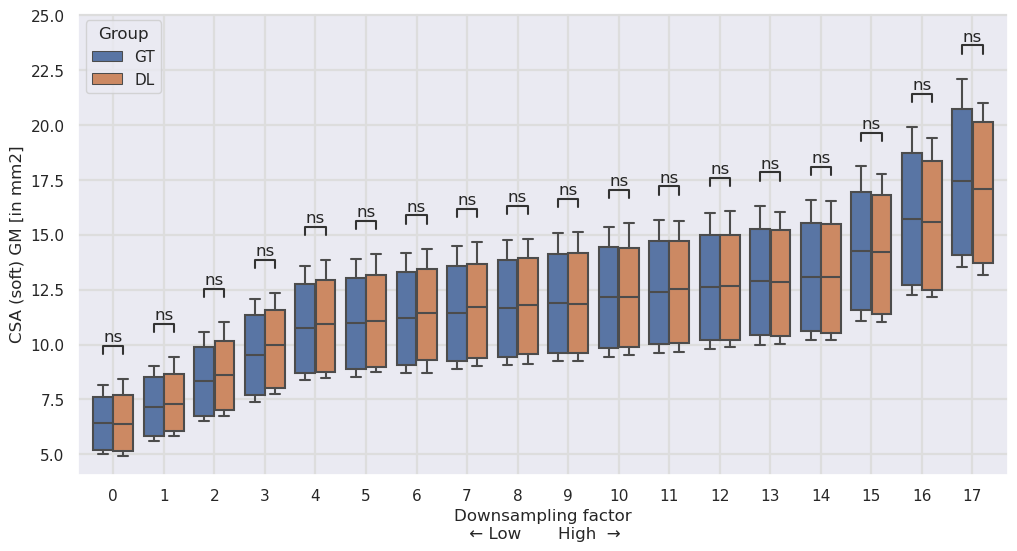

In [51]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_gm.xlsx')
df1=data
df_csa_gm = df1.filter(['csa_soft_gm_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_soft_gm_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_soft_gm_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_soft_gm_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(12,6))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA (soft) GM [in mm2]')
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()
pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

#plt.savefig(path_database + 'Fig_CSA_GM_soft.pdf')

[Text(0.5, 0, 'Downsampling factor [%]\n ← Low       High  →'),
 Text(0, 0.5, 'Difference: [% changes GT - % changes DL]')]

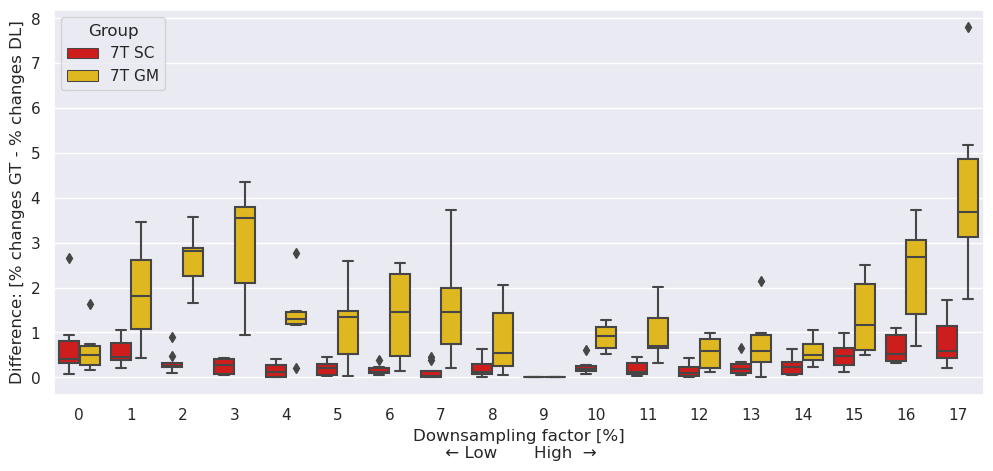

In [45]:
path_database = "/mnt/d/crmbm/paper/"
data_sc=pd.read_excel(path_database + '/csa_dl_gt_clean_sc.xlsx')
data_gm=pd.read_excel(path_database + '/csa_dl_gt_clean_gm.xlsx')

df1=data_sc
df2=data_gm
df_csa_sc = df1.filter(['error_sc %','transf'], axis=1)
df_csa_sc.insert(0, 'Group', '7T SC')
df_csa_sc.rename(columns={'error_sc %': 'CSA_error'}, inplace=True)
df_csa_gm = df2.filter(['error_gm %','transf'], axis=1)
df_csa_gm.insert(0, 'Group', '7T GM') 
df_csa_gm.rename(columns={'error_gm %': 'CSA_error'}, inplace=True)

frames = [df_csa_sc, df_csa_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(12,5))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="hot")
ax_csa_gm.set(xlabel = 'Downsampling factor [%]\n ← Low       High  →', ylabel = 'Difference: [% changes GT - % changes DL]')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GM GT vs. 9_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01
10_GM GT vs. 10_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
11_GM GT vs. 11_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
12_GM GT vs. 12_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.750e+01
13_GM GT vs. 13_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01
14_GM GT vs. 14_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.483e-01 U_stat=2.050e+01
15_GM GT vs. 15_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.991e-01 U_stat=2.100e+01
16_GM GT vs. 16_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=2.200e+01
17_GM GT vs. 17_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA (soft) [in mm2] \n GM                                                   SC'>,
  <statannotations.Annotation.Annotation at 0x7ff0565388d0>])

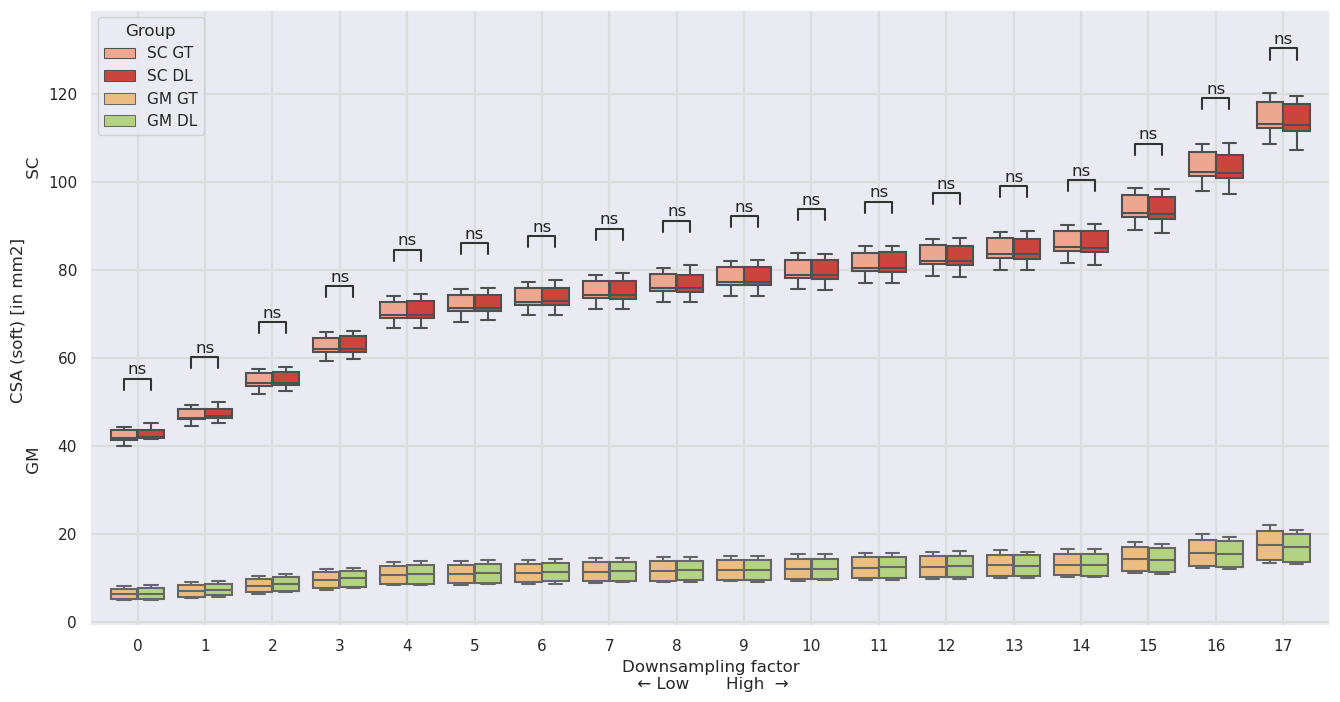

In [53]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_sc.xlsx')

df1=data
df_csa_gm = df1.filter(['csa_soft_sc_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'SC GT')
df_csa_gm.rename(columns={'csa_soft_sc_gt': 'CSA_error'}, inplace=True)

df_csa_lin_gm = df1.filter(['csa_soft_sc_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'SC DL')
df_csa_lin_gm.rename(columns={'csa_soft_sc_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(16,8))
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
sns.set()
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="Reds")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA SC (soft) [in mm2]')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()



path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/csa_dl_gt_clean_gm.xlsx')
df1=data
df_csa_gm = df1.filter(['csa_soft_gm_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GM GT')
df_csa_gm.rename(columns={'csa_soft_gm_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_soft_gm_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'GM DL')
df_csa_lin_gm.rename(columns={'csa_soft_gm_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

#fig, ax = plt.subplots(figsize=(12,6))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="RdYlGn")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA (soft) [in mm2] \n GM                                                   SC')
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()


pairs_2=[((0, "GM GT"), (0, "GM DL")),
       ((1, "GM GT"), (1, "GM DL")),
       ((2, "GM GT"), (2, "GM DL")),
       ((3, "GM GT"), (3, "GM DL")),
       ((4, "GM GT"), (4, "GM DL")),
       ((5, "GM GT"), (5, "GM DL")),
       ((6, "GM GT"), (6, "GM DL")),
       ((7, "GM GT"), (7, "GM DL")),
       ((8, "GM GT"), (8, "GM DL")),
       ((9, "GM GT"), (9, "GM DL")),
       ((10, "GM GT"), (10, "GM DL")),
       ((11, "GM GT"), (11, "GM DL")),
       ((12, "GM GT"), (12, "GM DL")),
       ((13, "GM GT"), (13, "GM DL")),
       ((14, "GM GT"), (14, "GM DL")),
       ((15, "GM GT"), (15, "GM DL")),
       ((16, "GM GT"), (16, "GM DL")),
       ((17, "GM GT"), (17, "GM DL"))]

annotator_csa_sc = Annotator(ax_csa_gm, pairs_2, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_sc.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_sc.apply_and_annotate()

# 3T

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:7.984e-01 U_stat=3.500e+01
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-01 U_stat=4.100e+01
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=4.200e+01
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-01 U_stat=4.100e+01
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:6.454e-01 U_stat=3.700e+01
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-01 U_stat=4.100e+01
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:4.418e-01 U_stat=4.000e+01
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=4.200e+01
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:2.786e-01 U_stat=4.300e+01
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA SC (soft) [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7ff05d47b890>])

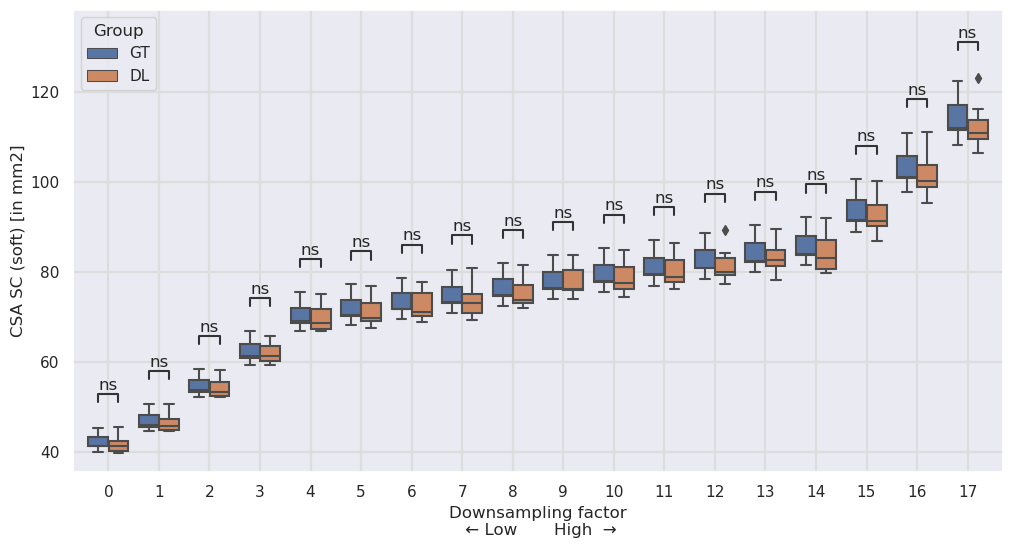

In [55]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_sc.xlsx')

df1=data
df_csa_gm = df1.filter(['csa_soft_sc_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_soft_sc_gt': 'CSA_error'}, inplace=True)

df_csa_lin_gm = df1.filter(['csa_soft_sc_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_soft_sc_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(12,6))
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
sns.set()
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group", ax=ax)
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA SC (soft) [in mm2]')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()


pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

#plt.savefig(path_database + 'Fig_CSA_SC_soft.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GT vs. 9_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.900e+01
10_GT vs. 10_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=1.400e+01
11_GT vs. 11_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.182e-01 U_stat=1.600e+01
12_GT vs. 12_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.182e-01 U_stat=2.000e+01
13_GT vs. 13_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=1.400e+01
14_GT vs. 14_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
15_GT vs. 15_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.900e+01
16_GT vs. 16_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
17_GT vs. 17_DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01
8_GT vs. 8_DL: Mann-Whitney-W

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA (soft) GM [in mm2]'>,
  <statannotations.Annotation.Annotation at 0x7ff0569c4890>])

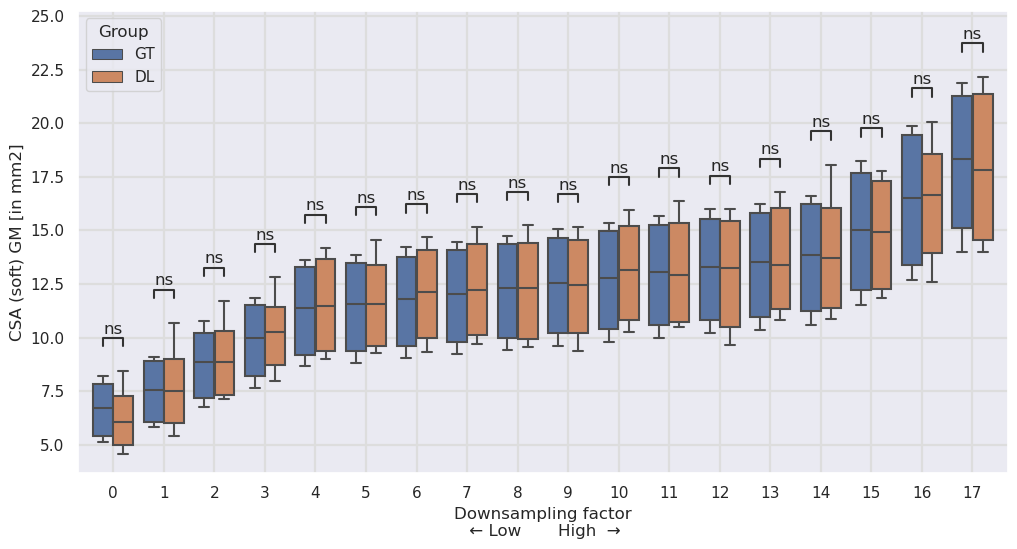

In [56]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_gm.xlsx')
df1=data
df_csa_gm = df1.filter(['csa_soft_gm_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GT')
df_csa_gm.rename(columns={'csa_soft_gm_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_soft_gm_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'DL')
df_csa_lin_gm.rename(columns={'csa_soft_gm_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(12,6))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA (soft) GM [in mm2]')
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()
pairs=[((0, "GT"), (0, "DL")),
       ((1, "GT"), (1, "DL")),
       ((2, "GT"), (2, "DL")),
       ((3, "GT"), (3, "DL")),
       ((4, "GT"), (4, "DL")),
       ((5, "GT"), (5, "DL")),
       ((6, "GT"), (6, "DL")),
       ((7, "GT"), (7, "DL")),
       ((8, "GT"), (8, "DL")),
       ((9, "GT"), (9, "DL")),
       ((10, "GT"), (10, "DL")),
       ((11, "GT"), (11, "DL")),
       ((12, "GT"), (12, "DL")),
       ((13, "GT"), (13, "DL")),
       ((14, "GT"), (14, "DL")),
       ((15, "GT"), (15, "DL")),
       ((16, "GT"), (16, "DL")),
       ((17, "GT"), (17, "DL"))]

annotator_csa_gm = Annotator(ax_csa_gm, pairs, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_gm.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_gm.apply_and_annotate()

#plt.savefig(path_database + 'Fig_CSA_GM_soft.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_GM GT vs. 9_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.900e+01
10_GM GT vs. 10_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=1.400e+01
11_GM GT vs. 11_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.182e-01 U_stat=1.600e+01
12_GM GT vs. 12_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.182e-01 U_stat=2.000e+01
13_GM GT vs. 13_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.887e-01 U_stat=1.400e+01
14_GM GT vs. 14_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
15_GM GT vs. 15_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.900e+01
16_GM GT vs. 16_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01
17_GM GT vs. 17_GM DL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.

(<AxesSubplot:xlabel='Downsampling factor\n ← Low       High  →', ylabel='CSA Fake 3T(soft) [in mm2] \n GM                                                   SC'>,
  <statannotations.Annotation.Annotation at 0x7ffab7866cd0>])

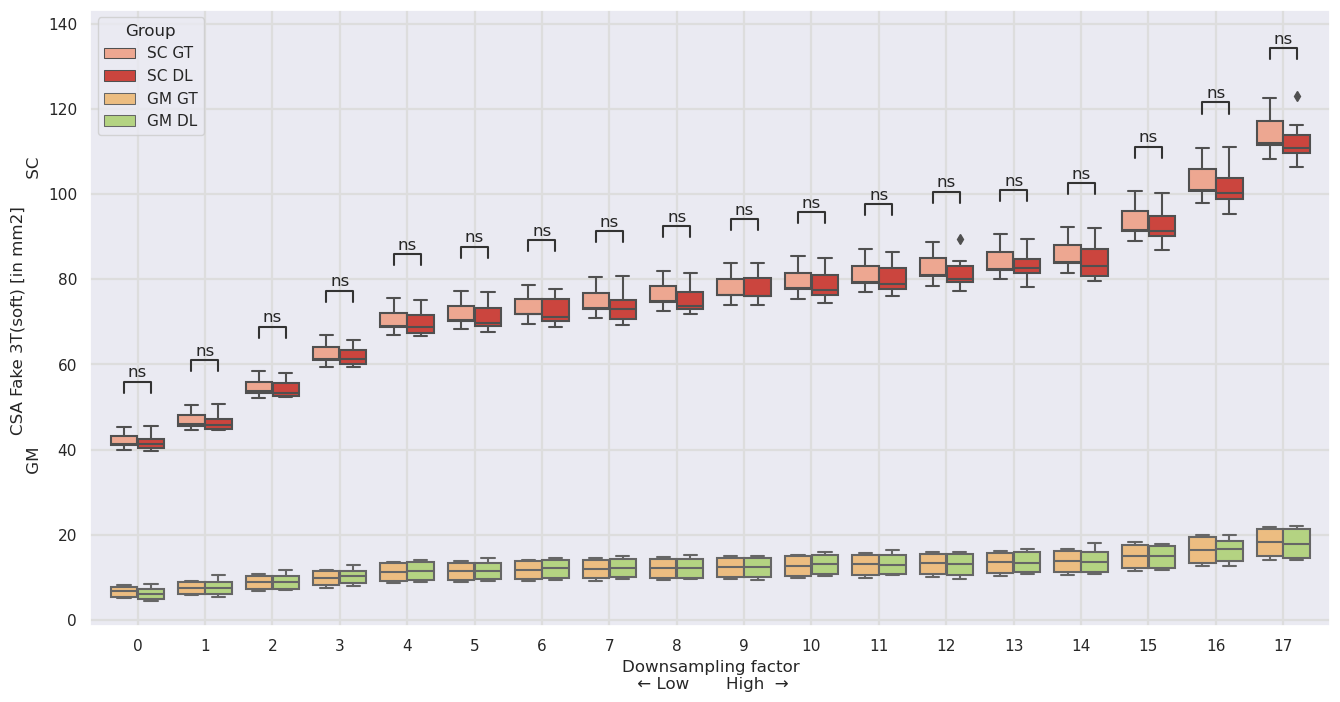

In [46]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_sc.xlsx')

df1=data
df_csa_gm = df1.filter(['csa_soft_sc_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'SC GT')
df_csa_gm.rename(columns={'csa_soft_sc_gt': 'CSA_error'}, inplace=True)

df_csa_lin_gm = df1.filter(['csa_soft_sc_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'SC DL')
df_csa_lin_gm.rename(columns={'csa_soft_sc_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

fig, ax = plt.subplots(figsize=(16,8))
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
sns.set()
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="Reds")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA SC (soft) [in mm2]')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()



path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_gm.xlsx')
df1=data
df_csa_gm = df1.filter(['csa_soft_gm_gt','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'GM GT')
df_csa_gm.rename(columns={'csa_soft_gm_gt': 'CSA_error'}, inplace=True)
df_csa_lin_gm = df1.filter(['csa_soft_gm_dl','transf'], axis=1)
df_csa_lin_gm.insert(0, 'Group', 'GM DL')
df_csa_lin_gm.rename(columns={'csa_soft_gm_dl': 'CSA_error'}, inplace=True)

frames = [df_csa_gm, df_csa_lin_gm]
result_csa_gm = pd.concat(frames, axis=0)

#fig, ax = plt.subplots(figsize=(12,6))
sns.set()

ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="RdYlGn")
ax_csa_gm.set(xlabel = 'Downsampling factor\n ← Low       High  →', ylabel = 'CSA Fake 3T(soft) [in mm2] \n GM                                                   SC')
ax.grid(which='major', color='#DDDDDD', linewidth=1.6)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.minorticks_on()


pairs_2=[((0, "GM GT"), (0, "GM DL")),
       ((1, "GM GT"), (1, "GM DL")),
       ((2, "GM GT"), (2, "GM DL")),
       ((3, "GM GT"), (3, "GM DL")),
       ((4, "GM GT"), (4, "GM DL")),
       ((5, "GM GT"), (5, "GM DL")),
       ((6, "GM GT"), (6, "GM DL")),
       ((7, "GM GT"), (7, "GM DL")),
       ((8, "GM GT"), (8, "GM DL")),
       ((9, "GM GT"), (9, "GM DL")),
       ((10, "GM GT"), (10, "GM DL")),
       ((11, "GM GT"), (11, "GM DL")),
       ((12, "GM GT"), (12, "GM DL")),
       ((13, "GM GT"), (13, "GM DL")),
       ((14, "GM GT"), (14, "GM DL")),
       ((15, "GM GT"), (15, "GM DL")),
       ((16, "GM GT"), (16, "GM DL")),
       ((17, "GM GT"), (17, "GM DL"))]

annotator_csa_sc = Annotator(ax_csa_gm, pairs_2, data=result_csa_gm, x="transf", y="CSA_error", hue='Group')#, order=order)
annotator_csa_sc.configure(test='Mann-Whitney', text_format='star', loc='inside').apply_test()
annotator_csa_sc.apply_and_annotate()

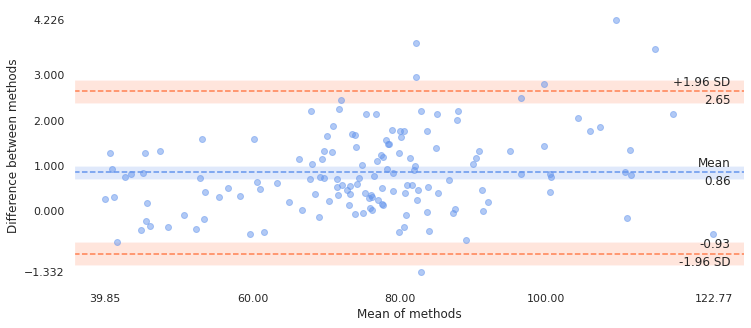

In [47]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_sc.xlsx')
method1 = data['csa_soft_sc_gt']#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
method2 = data['csa_soft_sc_dl']#[1.03, 2.05, 2.79, 3.67, 5.00, 5.82, 7.16, 7.69, 8.53, 10.38, 11.11, 12.17, 13.47, 13.83, 15.15, 16.12, 16.94, 18.09, 19.13, 19.54]
#plt.subplots(figsize=(12,6))
pyCompare.blandAltman(method1, method2, figureSize=((12,5)))

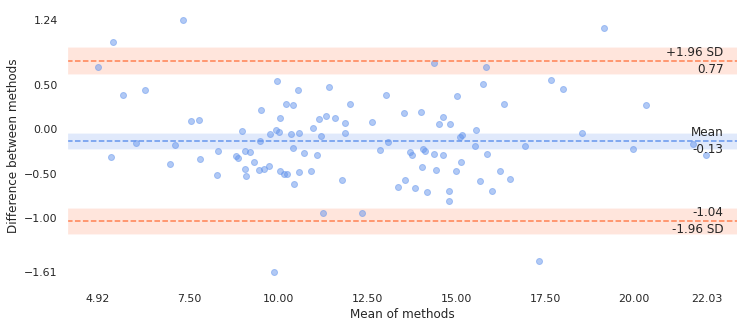

In [48]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + '/CSA_scaling_3T_gm.xlsx')
method1 = data['csa_soft_gm_gt']#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
method2 = data['csa_soft_gm_dl']#[1.03, 2.05, 2.79, 3.67, 5.00, 5.82, 7.16, 7.69, 8.53, 10.38, 11.11, 12.17, 13.47, 13.83, 15.15, 16.12, 16.94, 18.09, 19.13, 19.54]
#plt.subplots(figsize=(12,6))
pyCompare.blandAltman(method1, method2, figureSize=((12,5)))

[Text(0.5, 0, 'Downsampling factor [%]\n ← Low       High  →'),
 Text(0, 0.5, 'Difference: [% changes GT - % changes DL]')]

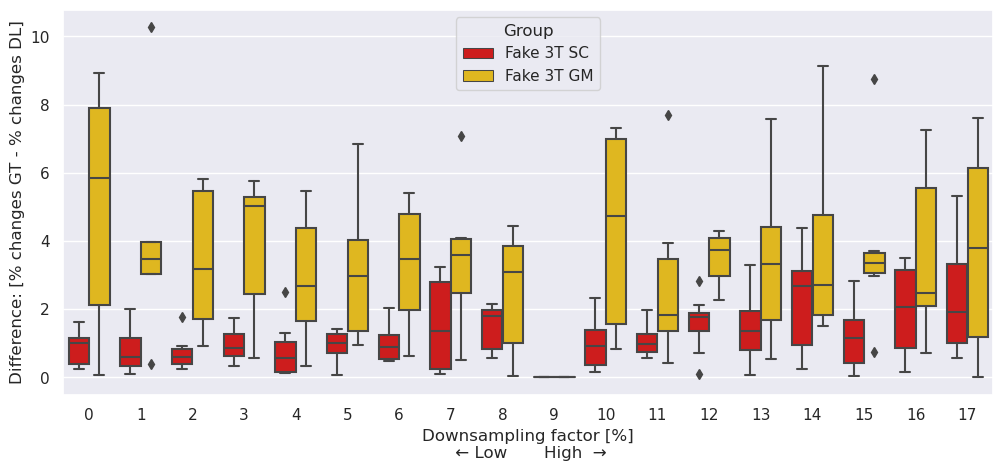

In [50]:
path_database = "/mnt/d/crmbm/paper/"
data_sc=pd.read_excel(path_database + '/CSA_scaling_3T_sc.xlsx')
data_gm=pd.read_excel(path_database + '/CSA_scaling_3T_gm.xlsx')

df1=data_sc
df2=data_gm
df_csa_sc = df1.filter(['error_sc %','transf'], axis=1)
df_csa_sc.insert(0, 'Group', 'Fake 3T SC')
df_csa_sc.rename(columns={'error_sc %': 'CSA_error'}, inplace=True)
df_csa_gm = df2.filter(['error_gm %','transf'], axis=1)
df_csa_gm.insert(0, 'Group', 'Fake 3T GM') 
df_csa_gm.rename(columns={'error_gm %': 'CSA_error'}, inplace=True)

frames = [df_csa_sc, df_csa_gm]
result_csa_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(12,5))
ax_csa_gm = sns.boxplot(data=result_csa_gm, x="transf", y="CSA_error", hue="Group",palette="hot")
ax_csa_gm.set(xlabel =  'Downsampling factor [%]\n ← Low       High  →', ylabel = 'Difference: [% changes GT - % changes DL]')

# Fig 07
Segmentation examples(GT/sct/7T_seg_UNC) + fails segmentation  

# Fig 08
Ratio P/A

<Figure size 1200x600 with 0 Axes>

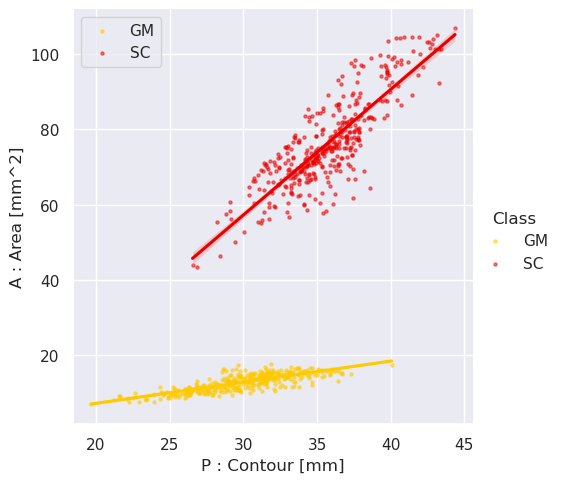

In [58]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'ratio_gm_sc_hc.xlsx')
data
#plt.savefig('Fig_repro.pdf')
table=[]
table_contour = pd.pivot_table(data, values=['contour'], index=['Class'],
                    aggfunc={'contour': np.mean})
table_area = pd.pivot_table(data, values=['area'], index=['Class'],
                    aggfunc={'area': np.mean})
table_ratio = pd.pivot_table(data, values=['ratio'], index=['Class'],
                    aggfunc={'ratio': np.mean})

table_contour_sd = pd.pivot_table(data, values=['contour'], index=['Class'],
                    aggfunc={'contour': np.std})
table_area_sd = pd.pivot_table(data, values=['area'], index=['Class'],
                    aggfunc={'area': np.std})
table_ratio_sd = pd.pivot_table(data, values=['ratio'], index=['Class'],
                    aggfunc={'ratio': np.std})

frames = [table_contour,table_area,table_ratio,table_contour_sd,table_area_sd,table_ratio_sd]
result = pd.concat(frames,axis=1)


### contour = df1.filter(['contour'], axis=1)
df1=data
#area = df1.filter(['area'], axis=1)
plt.figure(figsize=(12,6))


#plt.scatter(sc_contour, sc_area, c ="blue", linewidths = 2, marker =".", s = 2)
plot=sns.lmplot(x='contour', y='area', data=data, hue='Class', scatter_kws={"s": 5, "alpha": 0.5},palette="hot_r")
plot.set(xlabel = 'P : Contour [mm]', ylabel = 'A : Area [mm^2]')
plt.legend(loc='best')
plt.show()

In [59]:
result

,contour,area,ratio,contour,area,ratio
Class,,,,,,
GM,29.829375,12.746722,2.382681,3.330884,2.331903,0.279882
SC,35.709606,76.278013,0.473936,2.918416,11.541460,0.044703


<Figure size 1200x600 with 0 Axes>

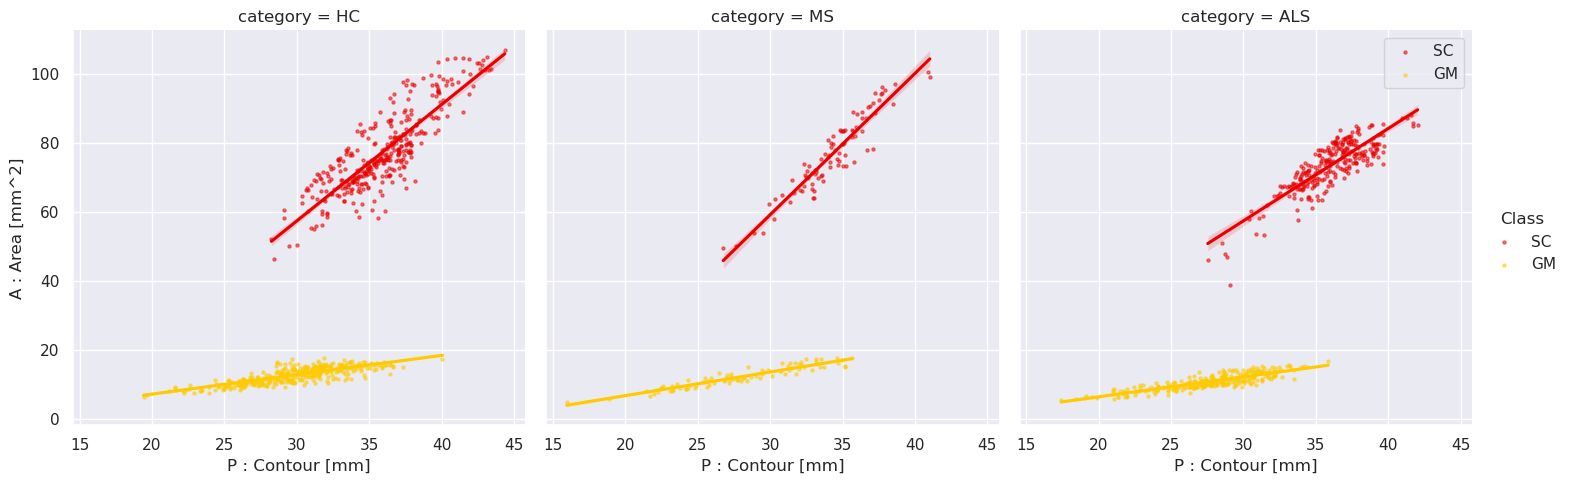

In [121]:
path_database = "/mnt/d/crmbm/paper/"
data=pd.read_excel(path_database + 'ratio_all.xlsx')
data


table=[]
table_contour = pd.pivot_table(data, values=['contour'], index=['Class','category'],
                    aggfunc={'contour': np.mean})
table_area = pd.pivot_table(data, values=['area'], index=['Class','category'],
                    aggfunc={'area': np.mean})
table_ratio = pd.pivot_table(data, values=['ratio'], index=['Class','category'],
                    aggfunc={'ratio': np.mean})

table_contour_sd = pd.pivot_table(data, values=['contour'], index=['Class','category'],
                    aggfunc={'contour': np.std})
table_area_sd = pd.pivot_table(data, values=['area'], index=['Class','category'],
                    aggfunc={'area': np.std})
table_ratio_sd = pd.pivot_table(data, values=['ratio'], index=['Class','category'],
                    aggfunc={'ratio': np.std})

frames = [table_contour,table_area,table_ratio,table_contour_sd,table_area_sd,table_ratio_sd]
result = pd.concat(frames,axis=1)


### contour = df1.filter(['contour'], axis=1)
df1=data
area = df1.filter(['area'], axis=1)

plt.figure(figsize=(12,6))


#plt.scatter(sc_contour, sc_area, c ="blue", linewidths = 2, marker =".", s = 2)
plot=sns.lmplot(x='contour', y='area', data=data, hue='Class',  col="category",scatter_kws={"s": 5, "alpha": 0.5},palette="hot")
plot.set(xlabel = 'P : Contour [mm]', ylabel = 'A : Area [mm^2]')
plt.legend(loc='best')
plt.savefig('Fig_ratio.pdf')
plt.show()


In [70]:
result

contour       area     ratio   contour       area     ratio
Class category                                                               
GM    ALS       27.742869  10.921170  2.596266  3.283520   2.219145  0.320560
      HC        29.779630  12.725731  2.383789  3.411105   2.367623  0.282271
      MS        27.881334  12.192278  2.355427  4.201546   3.047645  0.304710
SC    ALS       36.029363  73.561539  0.492392  2.310581   7.275702  0.032446
      HC        35.834200  77.104148  0.469947  2.851811  11.262775  0.041493
      MS        34.345076  76.991401  0.451091  2.547400  11.078608  0.037172